# Untargeted Evasion Attacks using FSGM, BMI, JSMA, CW, and PGD 

In [22]:
import tensorflow as tf
import art
import warnings
#global configuration
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
tf.compat.v1.disable_eager_execution()
print(f'Tensorflow version {tf.__version__}')
print(f'ART Version {art.__version__}')
import sys
sys.path.append('../lib')
import utils
from utils import load_preprocess, show_adversarial_images

Tensorflow version 2.15.1
ART Version 1.17.1


In [23]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
# Load a pre-trained ResNet50 model trained on ImageNet
model = ResNet50V2(weights='imagenet')
utils.model = model

In [24]:
plane1 = load_preprocess('../images/plane1.jpg')
plane2 = load_preprocess('../images/plane2.jpg')
plane3 = load_preprocess('../images/plane3.jpg')


In [25]:
from art.estimators.classification import KerasClassifier
# create an classifier from the model and constrain input ranges to range for image values i.e 0..255 
classifier = KerasClassifier(model=model, clip_values=(0, 255))


## FSGM Untargeted Attacks

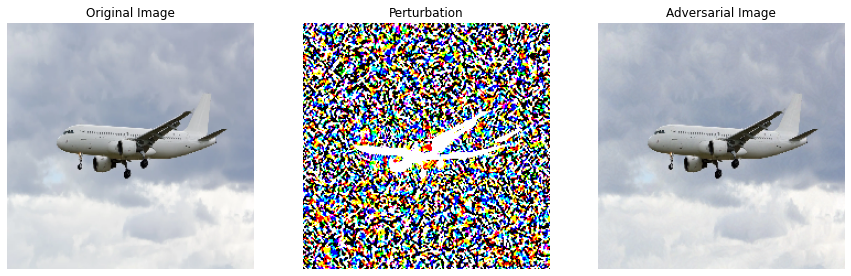

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9418199}
prediction for adversarial image: 
 {'label': 895, 'wordnet_id': 'n04552348', 'class_name': 'warplane', 'confidence_score': 0.9763991}


In [26]:
from art.attacks.evasion import FastGradientMethod
# Craft adversarial examples using FGSM
def fgsm_attack(sample, classifier=classifier, epsilon = 0.01):
    fgsm = FastGradientMethod(estimator=classifier, eps=epsilon)
    # Generate the adversarial example
    x_adv = fgsm.generate(x=sample)
    adv_img = show_adversarial_images(sample,x_adv)
    return x_adv, adv_img
_,_ = fgsm_attack(plane1)

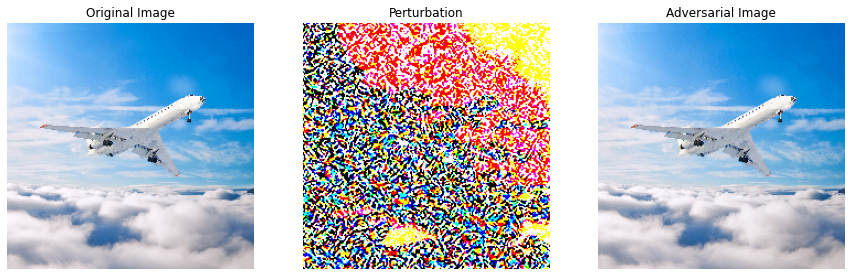

prediction for original image: 
 {'label': 908, 'wordnet_id': 'n04592741', 'class_name': 'wing', 'confidence_score': 0.72756416}
prediction for adversarial image: 
 {'label': 405, 'wordnet_id': 'n02692877', 'class_name': 'airship', 'confidence_score': 0.96300226}


In [27]:
__=fgsm_attack(plane2)

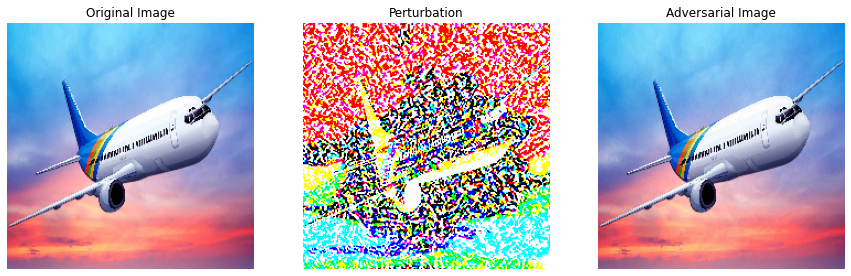

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9722899}
prediction for adversarial image: 
 {'label': 405, 'wordnet_id': 'n02692877', 'class_name': 'airship', 'confidence_score': 0.9991258}


In [28]:
__=fgsm_attack(plane3)

## Basic Iterative Method

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

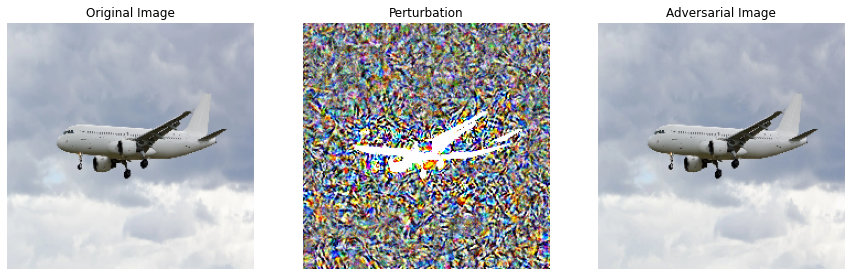

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9418199}
prediction for adversarial image: 
 {'label': 895, 'wordnet_id': 'n04552348', 'class_name': 'warplane', 'confidence_score': 0.99990475}


In [29]:
from art.attacks.evasion import BasicIterativeMethod

def bmi_attack(sample, wrapper=classifier,  epsilon=0.01, eps_step=0.001, max_iter=10, batch_size=32):
    bmi = BasicIterativeMethod(estimator=wrapper, eps=epsilon, eps_step=0.001, max_iter=10,batch_size=32)
    # Generate the adversarial example
    x_adv = bmi.generate(x=sample)
    adv_img = show_adversarial_images(sample,x_adv)
    return x_adv, adv_img
_,_ = bmi_attack(plane1)

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

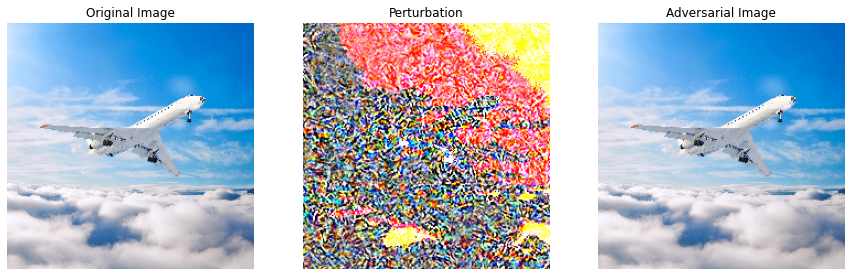

prediction for original image: 
 {'label': 908, 'wordnet_id': 'n04592741', 'class_name': 'wing', 'confidence_score': 0.72756416}
prediction for adversarial image: 
 {'label': 405, 'wordnet_id': 'n02692877', 'class_name': 'airship', 'confidence_score': 1.0}


PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

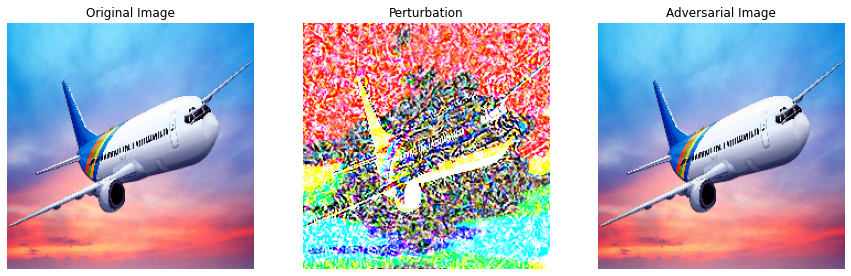

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9722899}
prediction for adversarial image: 
 {'label': 405, 'wordnet_id': 'n02692877', 'class_name': 'airship', 'confidence_score': 0.9999974}


In [30]:
_,_ = bmi_attack(plane2)
_,_ = bmi_attack(plane3)

## JSMA Attack

In [31]:
from art.attacks.evasion import SaliencyMapMethod

def jsma_attack(sample, classifier=classifier, theta=0.1, gamma=1 ,batch_size=1):  
    jsma = SaliencyMapMethod(classifier=classifier, theta=theta, gamma=gamma, batch_size=batch_size)
    # Generate the adversarial example
    x_adv = jsma.generate(x=sample)
    adv_img = show_adversarial_images(sample,x_adv)
    return x_adv, adv_img


JSMA:   0%|          | 0/1 [00:00<?, ?it/s]

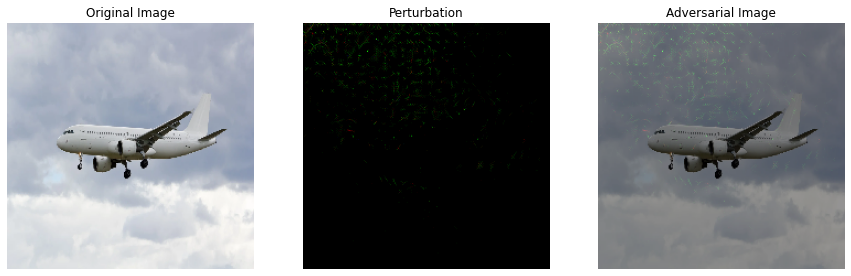

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9418199}
prediction for adversarial image: 
 {'label': 993, 'wordnet_id': 'n13037406', 'class_name': 'gyromitra', 'confidence_score': 0.2703939}


In [32]:
_,_ = jsma_attack(plane1)

JSMA:   0%|          | 0/1 [00:00<?, ?it/s]

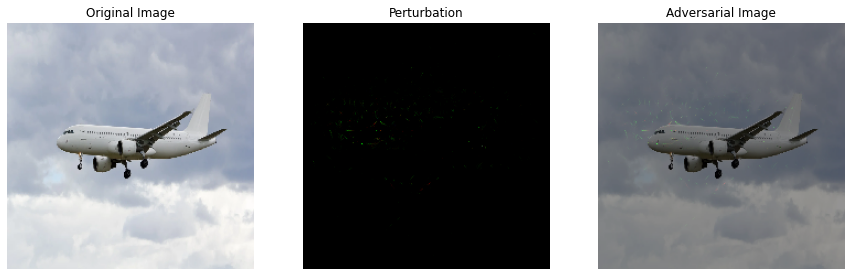

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9418199}
prediction for adversarial image: 
 {'label': 814, 'wordnet_id': 'n04273569', 'class_name': 'speedboat', 'confidence_score': 0.22912712}


In [33]:
_,_ = jsma_attack(plane1, theta=0.05, gamma=0.6)

JSMA:   0%|          | 0/1 [00:00<?, ?it/s]

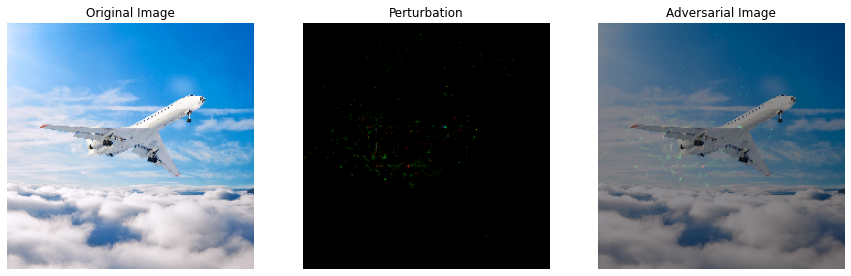

prediction for original image: 
 {'label': 908, 'wordnet_id': 'n04592741', 'class_name': 'wing', 'confidence_score': 0.72756416}
prediction for adversarial image: 
 {'label': 830, 'wordnet_id': 'n04336792', 'class_name': 'stretcher', 'confidence_score': 0.16156963}


In [34]:
_,_ = jsma_attack(plane2)

JSMA:   0%|          | 0/1 [00:00<?, ?it/s]

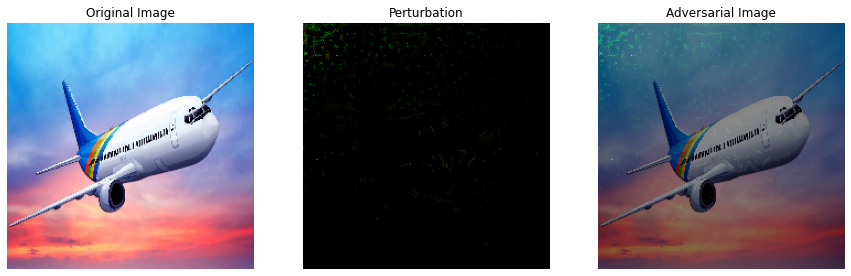

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9722899}
prediction for adversarial image: 
 {'label': 800, 'wordnet_id': 'n04243546', 'class_name': 'slot', 'confidence_score': 0.32029846}


In [35]:
_,_ = jsma_attack(plane3)

## Carlini-Wagner Attack

In [36]:
from art.attacks.evasion import CarliniL2Method
def cw_attack(sample, wrapper=classifier, confidence=0.1, batch_size=1, learning_rate=0.01, max_iter=10):
    cw = CarliniL2Method(classifier=wrapper, confidence=confidence, batch_size=batch_size, learning_rate=learning_rate, max_iter=max_iter)
    # Generate the adversarial example
    x_adv = cw.generate(x=sample)
    adv_img = show_adversarial_images(sample, x_adv)
    return x_adv, adv_img

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

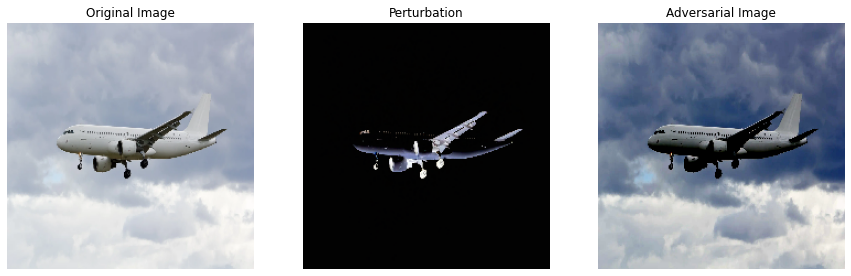

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9418199}
prediction for adversarial image: 
 {'label': 812, 'wordnet_id': 'n04266014', 'class_name': 'space_shuttle', 'confidence_score': 0.81334424}


In [37]:
_,_ = cw_attack(plane1)

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

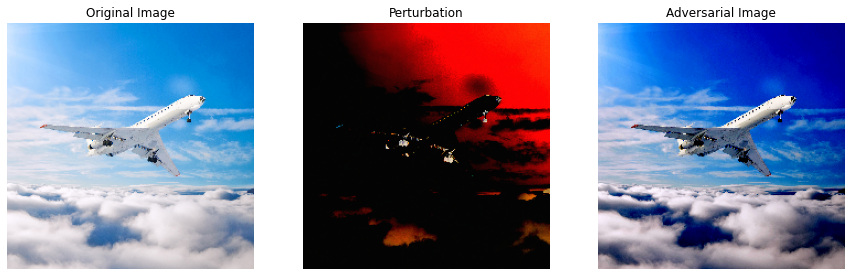

prediction for original image: 
 {'label': 908, 'wordnet_id': 'n04592741', 'class_name': 'wing', 'confidence_score': 0.72756416}
prediction for adversarial image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.5680147}


In [38]:
_,_ = cw_attack(plane2)

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

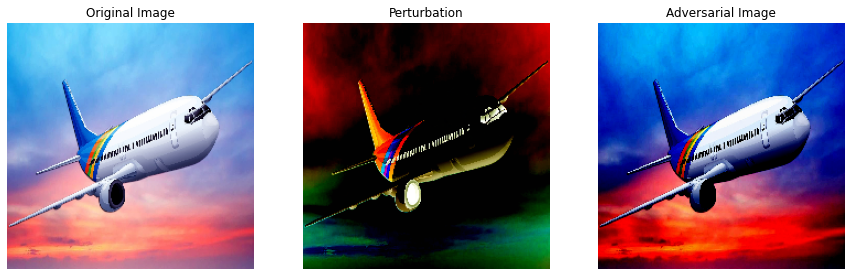

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9722899}
prediction for adversarial image: 
 {'label': 405, 'wordnet_id': 'n02692877', 'class_name': 'airship', 'confidence_score': 0.5678342}


In [39]:
_,_ = cw_attack(plane3)

## PGD attack

In [40]:
from art.attacks.evasion import ProjectedGradientDescent

def pgd_attack( sample, wrapper=classifier, eps=0.3, eps_step=0.1, max_iter=40, batch_size=1):
    pgd = ProjectedGradientDescent(estimator=wrapper, eps=eps, eps_step=eps_step, max_iter=max_iter, batch_size=batch_size)
    # Generate the adversarial example
    x_adv = pgd.generate(x=sample)
    adv_img = show_adversarial_images(sample, x_adv)
    return x_adv, adv_img

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

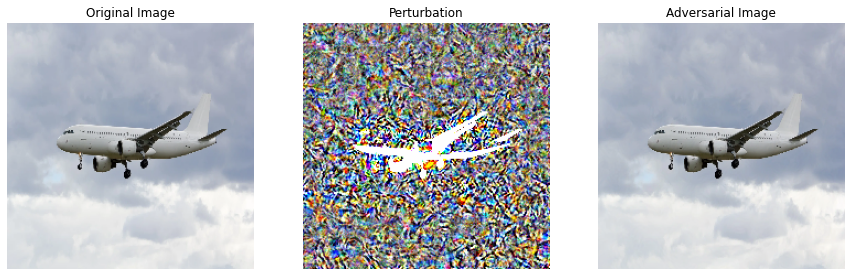

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9418199}
prediction for adversarial image: 
 {'label': 895, 'wordnet_id': 'n04552348', 'class_name': 'warplane', 'confidence_score': 0.99988234}


PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

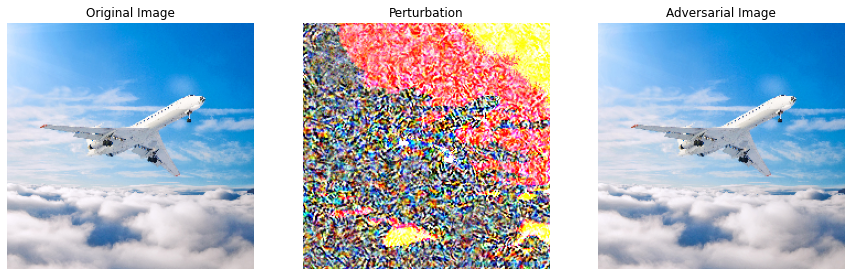

prediction for original image: 
 {'label': 908, 'wordnet_id': 'n04592741', 'class_name': 'wing', 'confidence_score': 0.72756416}
prediction for adversarial image: 
 {'label': 405, 'wordnet_id': 'n02692877', 'class_name': 'airship', 'confidence_score': 1.0}


PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

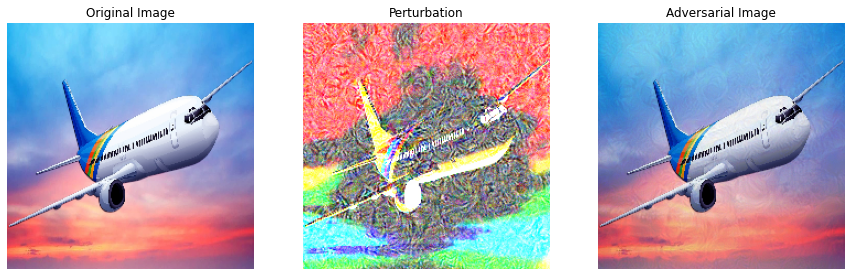

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9722899}
prediction for adversarial image: 
 {'label': 405, 'wordnet_id': 'n02692877', 'class_name': 'airship', 'confidence_score': 0.9999999}


In [41]:
_,_ = pgd_attack(plane1, eps=0.01, eps_step=0.001, max_iter=10)
_,_ = pgd_attack(plane2,eps=0.01, eps_step=0.001, max_iter=10)
_,_ = pgd_attack(plane3,eps=0.1, eps_step=0.01, max_iter=10)